In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import PIL
import os
import pathlib

from collections import Counter
from nltk.tokenize import regexp_tokenize

In [ ]:
#Assigning test/train directories to variables
train_dir = pathlib.Path('data/train')
test_dir = pathlib.Path('data/test')

In [ ]:
#generating list of test/train images and printing a count of each
train_images = list(train_dir.glob('*/*.jpg'))
test_images = list(test_dir.glob('*/*.jpg'))

#Assigning count to variables for possible future use
train_image_count = len(train_images)
test_image_count = len(test_images)

print('Training Image Count: ', train_image_count)
print('Testing Image Count: ', test_image_count)

Training Image Count:  15095
Testing Image Count:  3946


In [ ]:
#Checking average and median input image resolution sizes
width = []
height = []
count = 0

for image in train_images:
    w, h = PIL.Image.open(image).size
    width.append(w)
    height.append(h)
    count+=1

print("Median Image Width: ", np.median(width))
print("Mean Image Width: ", np.mean(width))

print("Median Image Height: ", np.median(height))
print("Mean Image Height: ", np.mean(height))

print("Image Count: ", count) # check to ensure all images are a part of the average

Median Image Width:  720.0
Mean Image Width:  658.6145743623716
Median Image Height:  480.0
Mean Image Height:  544.5156011924478
Image Count:  15095


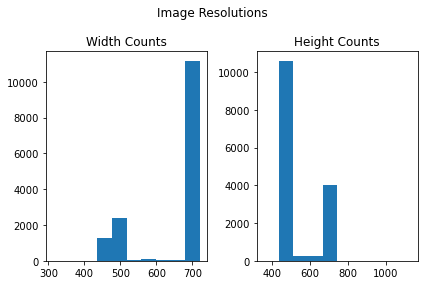

In [ ]:
#Quick Histogram of image sizes
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.hist(width)
ax1.set_title('Width Counts')

ax2.hist(height)
ax2.set_title('Height Counts')

fig.suptitle('Image Resolutions')
fig.tight_layout()

plt.show()

Upon examining the images I fear the 23 provided labels are too broad and that the variety of different conditions under each classification category will prevent any model from being particularly accurate.  For example, under Acne there are various types of Acne that look different and are on different body parts.  A solution would be to separate the sub-conditions into more output labels and focus on photo's and sub-conditions that are more homogenius.  The next few cells are some NLP of the file names to see if there is a practical way to separate out conditions.

In [ ]:
#creating bag of words of image file names, filtering out non-useful words and body parts.  Creating labels based on bodyparts
#would be very useful however not all files have the body part listed 
drop_words = ['ruff', 'smooth', 'of', 'disorders', 'drug', 'windowspath', 'data', 'train', 'pictures', 'and', 'jpg', 'related', 'diseases', 'generalized','other', 'photos', 'disease', 'infections']
drop_body_parts = ['groin', 'hair', 'loss', 'foot', 'soles','palms','skin','scalp','penis','hand','oral','vulva','nails','nail', 'vaginal','palm', 'infant', 'cell']

filename_tokens = [w for w in regexp_tokenize(str(train_images).lower(), r"\w+")  if w.isalpha()]
filename_tokens_filtered = [t for t in filename_tokens if t not in drop_words]
filename_tokens_filtered = [t for t in filename_tokens_filtered if t not in drop_body_parts]
filename_bow = Counter(filename_tokens_filtered)


In [ ]:
list(filename_bow.most_common(25))

[('psoriasis', 2118),
 ('tinea', 2087),
 ('eczema', 1999),
 ('lichen', 1918),
 ('tumors', 1839),
 ('seborrheic', 1733),
 ('carcinoma', 1679),
 ('planus', 1644),
 ('keratoses', 1628),
 ('warts', 1590),
 ('basal', 1586),
 ('keratosis', 1463),
 ('actinic', 1427),
 ('candidiasis', 1385),
 ('benign', 1383),
 ('molluscum', 1267),
 ('ringworm', 1249),
 ('fungal', 1249),
 ('malignant', 1246),
 ('acne', 1187),
 ('dermatitis', 1152),
 ('viral', 1149),
 ('lesions', 1145),
 ('fungus', 1039),
 ('rosacea', 964)]

In [ ]:
bigwords = []
for key in filename_bow.keys():
    if filename_bow[key] > 200:
        bigwords.append(key) 

In [ ]:
littlewords = []
for key in filename_bow.keys():
    if filename_bow[key] < 5:
        littlewords.append(key) 

In [ ]:
list(bigwords)

['acne',
 'rosacea',
 'lesion',
 'pigmentation',
 'nevus',
 'dermatitis',
 'actinic',
 'keratosis',
 'basal',
 'carcinoma',
 'malignant',
 'lesions',
 'keratoses',
 'cutaneous',
 'tissue',
 'cancer',
 'atopic',
 'bullous',
 'benign',
 'chronic',
 'herpes',
 'cellulitis',
 'impetigo',
 'bacterial',
 'lupus',
 'eczema',
 'lichen',
 'exanthems',
 'eruptions',
 'erythema',
 'viral',
 'alopecia',
 'hpv',
 'stds',
 'warts',
 'granuloma',
 'type',
 'molluscum',
 'light',
 'connective',
 'melanoma',
 'nevi',
 'moles',
 'fungus',
 'planus',
 'cyst',
 'psoriasis',
 'poison',
 'ivy',
 'contact',
 'seborrheic',
 'scabies',
 'lyme',
 'infestations',
 'bites',
 'tumors',
 'systemic',
 'tinea',
 'ringworm',
 'candidiasis',
 'fungal',
 'urticaria',
 'hives',
 'vasculitis',
 'vascular']

In [ ]:
list(littlewords)

['mechanica',
 'comedonesears',
 'forest',
 'gram',
 'negative',
 'labia',
 'upper',
 'carac',
 'aldara',
 'sclerosing',
 'dermatofibrosarcoma',
 'epidermodysplasia',
 'verruciformis',
 'leukemia',
 'lymphocytoma',
 'lymphoma',
 'lymphomatoid',
 'lymphosarcoma',
 'merkel',
 'verrucous',
 'balanitis',
 'botryomycosis',
 'staph',
 'ecthyma',
 'erysipeloid',
 'vulgaris',
 'lymphangitis',
 'staphylococal',
 'scalded',
 'streptococci',
 'chin',
 'rash',
 'hyperkeratotic',
 'scrotum',
 'hyperkeratosis',
 'iododerma',
 'knuckle',
 'pads',
 'maceration',
 'malum',
 'ulcer',
 'milroy',
 'parasitosis',
 'psychogenic',
 'phlebitis',
 'neonatorum',
 'measles',
 'roseola',
 'infantum',
 'laterothoracic',
 'exanthem',
 'men',
 'discoid',
 'hirsutism',
 'hot',
 'comb',
 'eyelash',
 'planopilaris',
 'monilethrix',
 'pili',
 'annulati',
 'polytrichia',
 'pseudopelade',
 'sheathed',
 'telogen',
 'traction',
 'trichorrhexis',
 'vaginosis',
 'inguinale',
 'lymphogranuloma',
 'venereum',
 'argyria',
 'cafe

There are too many frequently used words and as well they can be used in combination with each other so automating any file renaming and new folder/classification label creation would more than likley corrupt the data.